In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

data_dir = "~/data/crewpool/NFLData_2000-2013"
games_path = "{}/GAMES.csv".format(data_dir)

In [28]:
games = pd.read_csv(games_path).set_index("GID")
games['total'] = games.PTSV + games.PTSH
games['ou_diff'] = games.total - games.OU


spreads = games[['SEAS', 'WEEK', 'DAY', 'total', 'OU', 'ou_diff']]
mnf = spreads[spreads.DAY == 'MN']

spreads.sample(5)

,SEAS,WEEK,DAY,total,OU,ou_diff
GID,,,,,,
2568,2009,13,SUN,36,42.0,-6.0
2990,2011,5,SUN,52,38.5,13.5
483,2001,16,SUN,24,37.5,-13.5
16,2000,2,SUN,75,36.0,39.0
3702,2013,17,SUN,27,51.5,-24.5


43.214669532509404
14.291711505234932


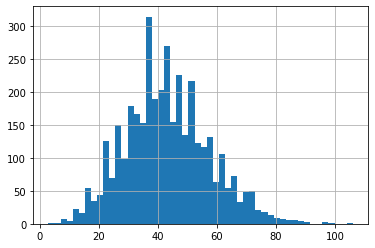

In [37]:
spreads.total.hist(bins=50).plot()
print(spreads.total.mean())
print(spreads.total.std())

44.82553191489362
14.914549600305067


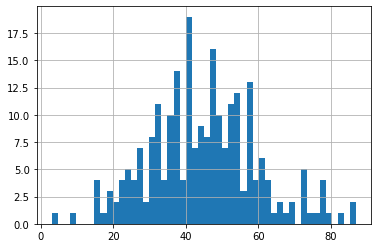

In [38]:
mnf.total.hist(bins=50).plot()
print(mnf.total.mean())
print(mnf.total.std())

1.0502418054809242
13.599184302790238


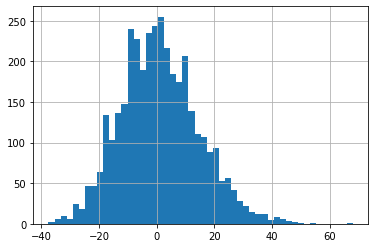

In [35]:
spreads.ou_diff.hist(bins=50).plot()
print(spreads.ou_diff.mean())
print(spreads.ou_diff.std())

1.4978723404255319
14.370293571603217


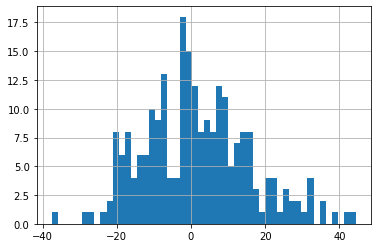

In [36]:
mnf.ou_diff.hist(bins=50).plot()
print(mnf.ou_diff.mean())
print(mnf.ou_diff.std())

In [69]:
diff_mean = spreads.ou_diff.mean()
diff_stddev = spreads.ou_diff.std()

norm_dist = stats.norm(loc=diff_mean, scale=diff_stddev)


print("ou_diff, p_value")
for i in range(-50, 50):
    p_lower = norm_dist.cdf(i)
    p_upper = norm_dist.cdf(i+1)
    p = p_upper - p_lower
    print("{},{}".format(i, p))


ou_diff, p_value
-50,2.9395339697575108e-05
-49,3.852653365047505e-05
-48,5.0222012948771824e-05
-47,6.511499666033061e-05
-46,8.396932400761884e-05
-45,0.00010769933426475455
-44,0.00013739094421808456
-43,0.00017432349541647682
-42,0.0002199917886184468
-41,0.00027612755282090356
-40,0.0003447194160970965
-39,0.00042803026225200617
-38,0.0005286106801712814
-37,0.0006493070528625169
-36,0.0007932627035308385
-35,0.000963910430955563
-34,0.0011649547410893706
-33,0.001400342131321444
-32,0.00167421792235198
-31,0.001990868372086386
-30,0.002354647154935323
-29,0.0027698857522877353
-28,0.0032407878737160632
-27,0.0037713087047635124
-26,0.004365020539372412
-25,0.005024967178549642
-24,0.005753510329238286
-23,0.006552172078942126
-22,0.00742147830693958
-21,0.008360808572572688
-20,0.009368258544385118
-19,0.01044052135173612
-18,0.011572794308831569
-17,0.012758717244172935
-16,0.013990348142242814
-15,0.01525818095948106
-14,0.016551209320869453
-13,0.017857038362700972
-12,0.01916